<a href="https://colab.research.google.com/github/WesleySouza13/Machine-Learnig/blob/main/Modelo_principal_de_risco_de_hipertens%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo principal de risco de hipertensão



VAMOS  CRIAR UM CASO DE ESTUDO, ONNDE NOS É OFERCEIDO UM CONJUNTO DE DADOS SOBRE PESSOAS PROPENSAS A TER HIPERTENSAO. VAMOS FAZER A IMPORTAÇÃO, MANIPULAÇÃO, SE PUDERMOS, A VIZUALIZAÇÃO E CRIAÇÃO DE UM MODELO PREDITIVO.

SERA USADO BIBLIOTECAS DE MANIPPULAÇÃO COMO PANDAS E NUMPY, DE VIZUALIZAÇÃO COMOO MATPLOTLIB, SEABORN E PLOTLY, E UMA BIBLIOTECA PARA CRIAÇÃO DO MODELO DE MACHHINE LEARNING. COMO É UM CASO DE ESTUDO, O DATASET PODE APRESENTAR ALGUMAS INCONSISTENCIAS E DADOS NÃO TÃO CONFIAVEIS, ISSO AFETA A ACURACIA DO MODELO. MAS VAMOS TRABALHAR PARA EVITARMOS ISSO.


VAMOS LA...


#IMPORTAÇÃO

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Hypertension-risk-model-main.csv')

#Manipulação

In [3]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


In [5]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,4240.000000,4240.000000,4240.000000,4211.000000,4187.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029615,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.310613
std,0.495027,8.572942,0.500024,11.922462,0.169544,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.462799
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4240 non-null   int64  
 1   age            4240 non-null   int64  
 2   currentSmoker  4240 non-null   int64  
 3   cigsPerDay     4211 non-null   float64
 4   BPMeds         4187 non-null   float64
 5   diabetes       4240 non-null   int64  
 6   totChol        4190 non-null   float64
 7   sysBP          4240 non-null   float64
 8   diaBP          4240 non-null   float64
 9   BMI            4221 non-null   float64
 10  heartRate      4239 non-null   float64
 11  glucose        3852 non-null   float64
 12  Risk           4240 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.8 KB


In [ ]:
#todos os dados são numéricos

In [20]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64

# Tratamento

In [18]:
df['cigsPerDay'].fillna(9.0, inplace = True)
df['cigsPerDay']

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4235    20.0
4236    15.0
4237     0.0
4238     0.0
4239    30.0
Name: cigsPerDay, Length: 4240, dtype: float64

In [51]:
df.drop(['BPMeds','totChol'], axis = 1)


,male,age,currentSmoker,cigsPerDay,diabetes,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0,141.0,98.0,25.60,67.0,72.0,1


In [53]:
data = df.dropna()

In [55]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

In [56]:
data

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,185.0,141.0,98.0,25.60,67.0,72.0,1


#Vizualização

AGORA, VAMOS OBSERVAR A MEDIA DE IDADE DE PESSOAS QUE PARTICIPARAM DESSA PESQUISA

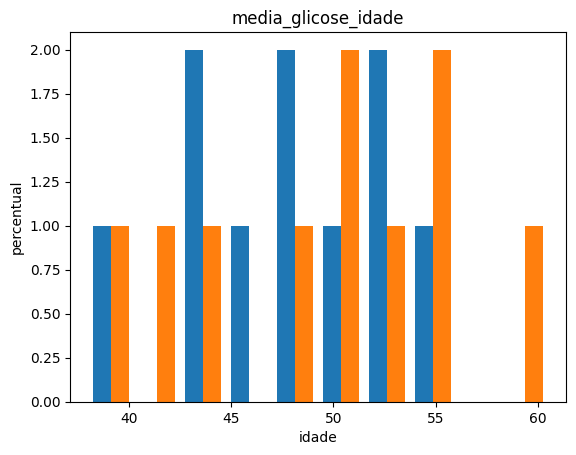

In [67]:
graf = data.groupby('glucose').agg({'age':'mean'}).reset_index()
media_glicose_idade = graf.head(10)
plt.hist(x = media_glicose_idade)
plt.title('media_glicose_idade')
plt.xlabel('idade')
plt.ylabel('percentual')
plt.show()


#CRIAÇÃO DE UM MODELO

AGORA, VAMOS DEFINIR AS VARIAVEIS X E Y PARA CLASSIFICAÇÃO

In [73]:
x = data.drop(['Risk'], axis = 1)
y = data['Risk']

# CRAÇÃO DE X E Y TESTE E X E Y TREINO

In [80]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.3)

AGORA QUE JA DEFINIMOS A VARIAVEL DE TREINO, VAMOS CRIAR O MODELO

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)
resultado = modelo.score(x_teste, y_teste)
print('Acuracia:', resultado )

Acuracia: 0.8852603706972639


# PREDIÇÃO

In [94]:
previsao = modelo.predict(x_teste[1:4])
previsao


array([0, 0, 0])

In [95]:
y_teste[1:4]

2939    0
1754    0
1080    0
Name: Risk, dtype: int64

# CONCLUSÃO!!!!

NOSSO MODELO APRESENTOU UMA TAXA DE ACERTO (ACURACIA) DE 88%, NOS TESTES, ELE CONSEGUIU ACERTAR A PREVISÃO DOS PACIENTES PROPENSOS A TER HIPERTENSÃO. ISSO É MUITO GRATIFICANTE, POIS, ALEM DO TRABALHO DE ESTUDO, SABEMOS QUE ISSO PODE DE, ALGUMA FORMA, GERAR VALOR NA VIDA DE ALGUEM.


